<a href="https://colab.research.google.com/github/ricospeloacaso/python_para_investimentos/blob/master/05_Backtesting_com_Pyfolio_Python_para_Investimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Python para Investimentos



Link para o vídeo: https://youtu.be/d2qrsCfXung

**Python para Investimentos** é um conjunto de códigos e vídeos em que mostro como utilizar a linguagem de programação PYTHON através da ferramenta online Google Colab para fazer estudos no mercado financeiro.

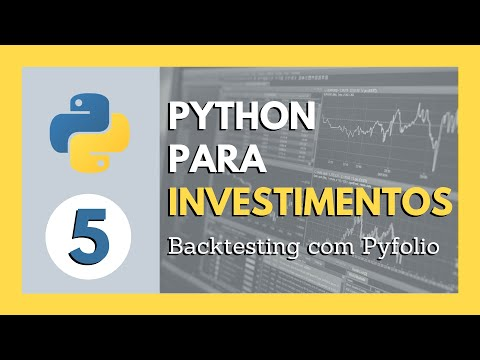

In [1]:
#@title Vídeo
from IPython.display import YouTubeVideo
YouTubeVideo('d2qrsCfXung', width=854, height=480)

# 1. Importando bibliotecas

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
#import pandas_datareader.data as web
#yf.pdr_override()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Para corrgir o bug: AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'
!pip install git+https://github.com/quantopian/pyfolio

In [5]:
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


# 2. Obtendo e tratando os dados

In [6]:
#tickers = ["ABEV3.SA", "ITSA4.SA", "WEGE3.SA", "USIM5.SA", "VALE3.SA", '^BVSP']
#dados_yahoo = web.get_data_yahoo(tickers, period="5y")["Adj Close"]

tickers = "ABEV3.SA ITSA4.SA WEGE3.SA USIM5.SA VALE3.SA ^BVSP"
dados_yahoo = yf.download(tickers=tickers, period="5y")['Adj Close']


[*********************100%***********************]  6 of 6 completed


In [7]:
dados_yahoo

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2015-06-26,16.677786,5.245173,4.219291,17.141329,13.281911,54017.000000
2015-06-29,16.520941,5.180994,4.190193,16.774387,13.109069,53014.000000
2015-06-30,16.547083,5.198499,3.996202,15.979350,13.143672,53081.000000
2015-07-01,16.669071,5.186829,3.967104,15.822092,13.468598,52758.000000
2015-07-02,16.590652,5.274344,3.986503,15.787147,13.530799,53106.000000
...,...,...,...,...,...,...
2020-06-22,14.110000,10.150000,6.960000,55.000000,45.599998,95336.000000
2020-06-23,13.930000,10.060000,7.680000,55.590000,46.119999,95975.000000
2020-06-24,13.680000,9.770000,7.330000,55.389999,46.049999,94377.000000


In [8]:
retorno = dados_yahoo.pct_change()
retorno

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2015-06-26,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-29,-0.009404,-0.012236,-0.006897,-0.021407,-0.013013,-0.018568
2015-06-30,0.001582,0.003379,-0.046296,-0.047396,0.002640,0.001264
2015-07-01,0.007372,-0.002245,-0.007281,-0.009841,0.024721,-0.006085
2015-07-02,-0.004704,0.016873,0.004890,-0.002209,0.004618,0.006596
...,...,...,...,...,...,...
2020-06-22,0.019509,-0.024976,-0.002865,-0.003081,-0.013201,-0.012799
2020-06-23,-0.012757,-0.008867,0.103448,0.010727,0.011404,0.006703
2020-06-24,-0.017947,-0.028827,-0.045573,-0.003598,-0.001518,-0.016650


In [9]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2015-06-26,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-06-29,0.990596,0.987764,0.993103,0.978593,0.986987,0.981432
2015-06-30,0.992163,0.991101,0.947126,0.932212,0.989592,0.982672
2015-07-01,0.999477,0.988877,0.940230,0.923038,1.014056,0.976693
2015-07-02,0.994775,1.005562,0.944828,0.920999,1.018739,0.983135
...,...,...,...,...,...,...
2020-06-22,0.846036,1.935112,1.649566,3.208619,3.433241,1.764926
2020-06-23,0.835243,1.917954,1.820211,3.243039,3.472392,1.776755
2020-06-24,0.820253,1.862665,1.737259,3.231371,3.467122,1.747172


In [10]:
carteira = 10000 * retorno_acumulado.iloc[:, :5]
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change()
carteira

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo,retorno
Date,,,,,,,
2015-06-26,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2015-06-29,9905.955686,9877.640984,9931.034600,9785.931735,9869.866597,49370.429602,-0.012591
2015-06-30,9921.630501,9911.014848,9471.264887,9322.118644,9895.919414,48521.948294,-0.017186
2015-07-01,9994.774681,9888.766514,9402.300052,9230.376612,10140.557689,48656.775548,0.002779
2015-07-02,9947.754811,10055.615834,9448.277362,9209.989927,10187.388711,48849.026644,0.003951
...,...,...,...,...,...,...,...
2020-06-22,8460.355448,19351.124667,16495.661692,32086.193903,34332.408062,110725.743771,-0.008415
2020-06-23,8352.427841,19179.539860,18202.108946,32430.391344,34723.918337,112888.386329,0.019532
2020-06-24,8202.527847,18626.650636,17372.585960,32313.713831,34671.215307,111186.693580,-0.015074


# 3. Resultados

Start date,2015-06-26
End date,2020-06-26
Total months,59
,Backtest
Annual return,18.123%
Cumulative returns,127.404%
Annual volatility,30.495%
Sharpe ratio,0.70
Calmar ratio,0.46
Stability,0.84
Max drawdown,-39.234%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,39.23,2015-06-26,2016-01-18,2016-08-15,297
1,38.67,2020-02-19,2020-03-23,NaT,NaN
2,22.13,2018-02-26,2018-06-21,2019-07-04,354
3,15.39,2017-02-21,2017-04-13,2017-08-07,120
4,14.49,2019-07-10,2019-08-26,2019-11-07,87


Stress Events,mean,min,max
Fall2015,-0.12%,-4.66%,4.60%
New Normal,0.08%,-13.85%,12.21%


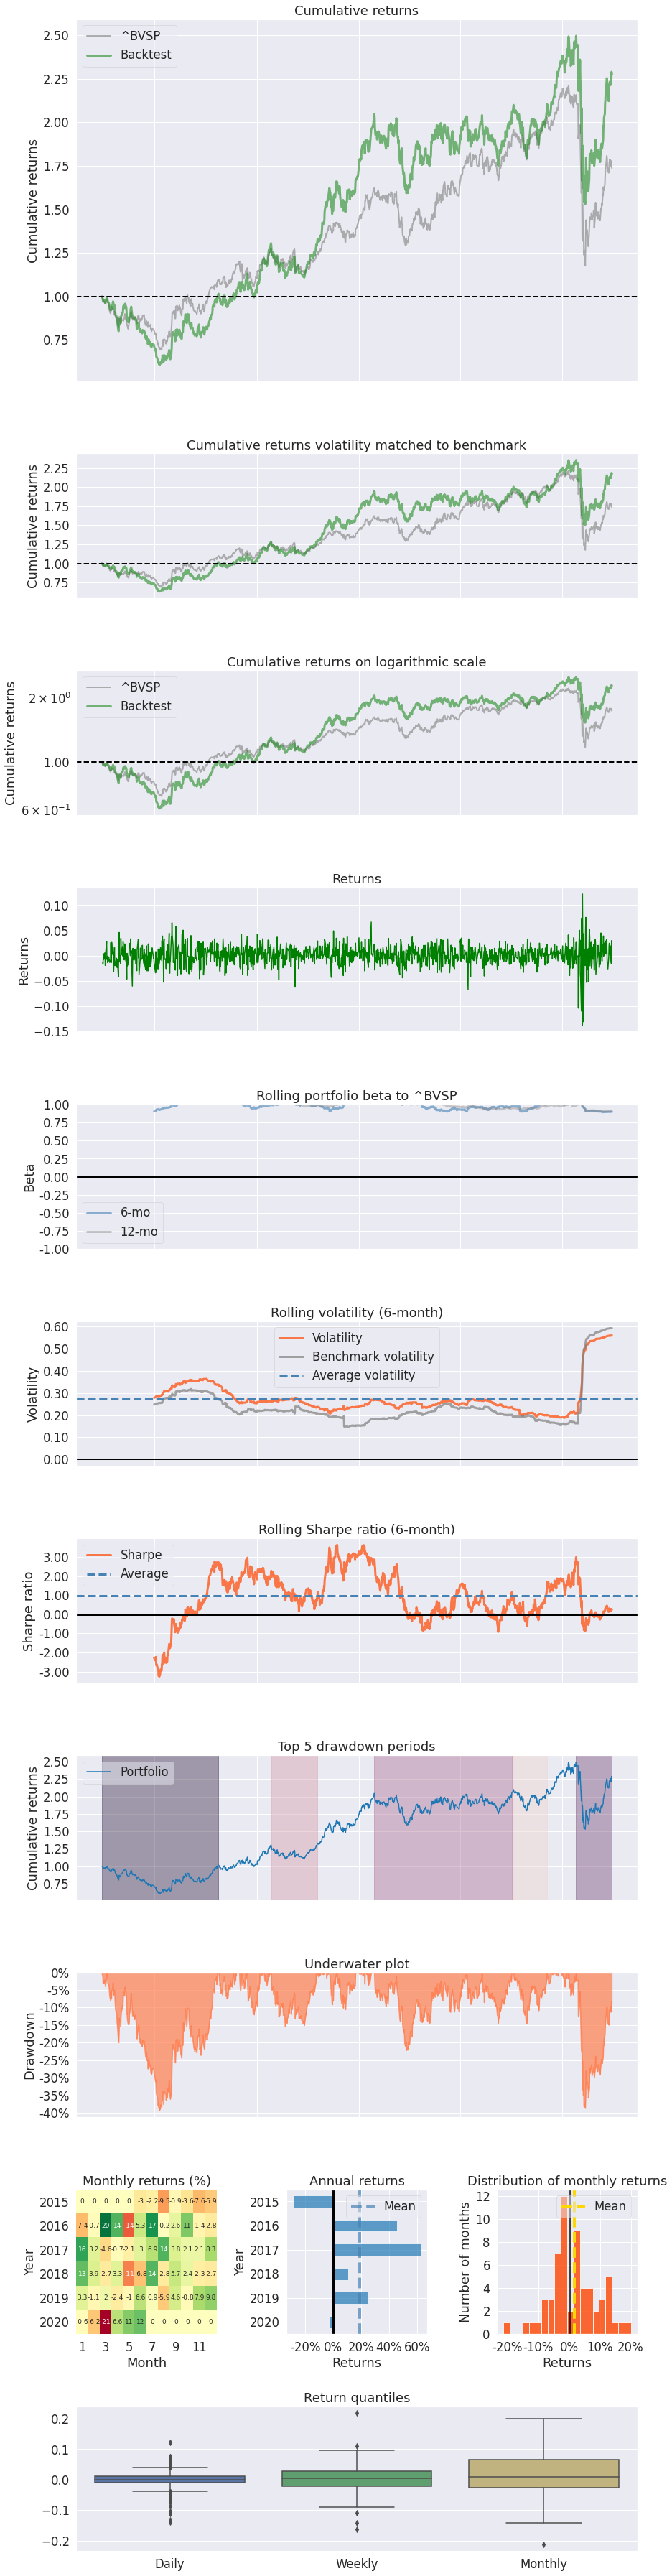

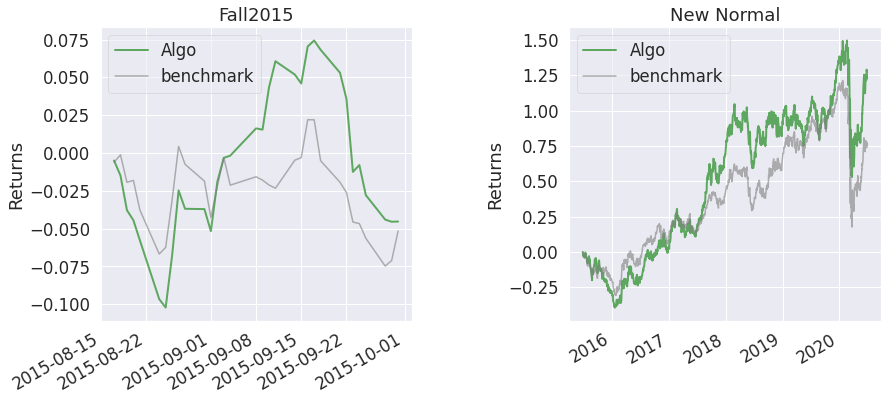

In [11]:
pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno["^BVSP"])


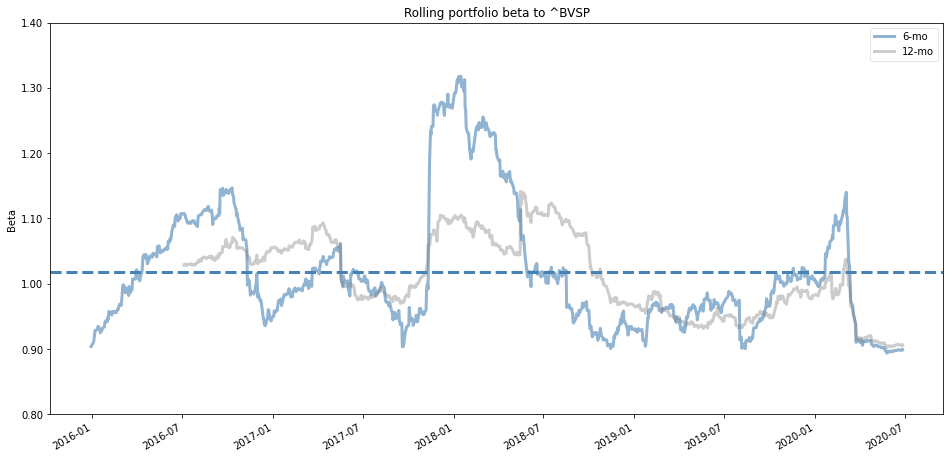

In [12]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(carteira["retorno"], factor_returns=retorno["^BVSP"], ax=ax1)
plt.ylim((0.8, 1.4));